In [1]:
import pandas as pd
import networkx as nx

In [2]:
def get_graph():

    df = pd.DataFrame({
    "from": {0: "Died", 1: "Elected Rep", 2: "Married", 3: "Born",
    4: "Elected Pres"},
    "to": {0: "Born", 1: "Elected Pres", 2: "Elected Rep", 3: "Married",
    4: "Died"},
    "weight": {0: 0.1, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0},
    })

    G = nx.from_pandas_edgelist(df, "from", "to", edge_attr=["weight"])
    # print(G.edges(data=True))
    # nx.draw(G)
    return(G)

#### Global Measures

Let’s pretend we are at a distance and instead of nodes, edges, and their attributes, we see a fuzzy
grayish cloud. What can we tell about that cloud? Not much: only its size and
density.

The size of a network is either its node count or edge count. You can measure
both using the standard Python len function and other specialized functions.

In [3]:
G = get_graph()

In [7]:
len(G) # Number of nodes

5

Number of Nodes

In [8]:
print(len(G.nodes()))
print(nx.number_of_nodes(G))

5
5


Number of Edges

In [9]:
print(len(G.edges()))
print(nx.number_of_edges(G))


5
5


In [10]:
len(list(nx.non_edges(G)))

5

#### Graph density
Graph density measures the fraction of existing edges out of all potentially
possible edges. Density is a number between 0 and 1, inclusive. A network with
density 0 has no edges whatsoever. A network with density 1 is a complete
graph. For a directed network with n nodes and m edges, density is calculated as
m/(n(n-1)); for undirected networks, it is calculated as 2m/(n(n-1)), because,
compared to directed networks, they have only half of potentially possible edges.
You can measure density by calling a namesake function.

The density of the Wikipedia network is low—only about 0.1 percent. Only one
out of about 1,000 possible edges exists in the graph. This value is not unusual:
most complex networks have similarly low density.

In [11]:
nx.density(G)

0.5

In [13]:
from operator import itemgetter
import networkx as nx
import wikipedia

SEED = "Complex network".title()

STOPS = ("International Standard Serial Number",
         "International Standard Book Number",
         "National Diet Library",
         "International Standard Name Identifier",
         "International Standard Book Number (Identifier)",
         "Pubmed Identifier", "Pubmed Central",
         "Digital Object Identifier", "Arxiv",
         "Proc Natl Acad Sci Usa", "Bibcode",
         "Library Of Congress Control Number", "Jstor")


In [14]:
todo_lst = [(0, SEED)] # The SEED is in the layer 0
todo_set = set(SEED)   # The SEED itself
done_set = set()       # Nothing is done yet

F = nx.DiGraph()
layer, page = todo_lst[0]

while layer < 2:
    del todo_lst[0] #(1)
    done_set.add(page)
    print(layer, page) # Show progress

    try: #(2)
        wiki = wikipedia.page(page)
    except:
        layer, page = todo_lst[0]
        print("Could not load", page)
        continue

    for link in wiki.links: #(3)
        link = link.title()
        if link not in STOPS and not link.startswith("List Of"):
            if link not in todo_set and link not in done_set:
                todo_lst.append((layer + 1, link))
                todo_set.add(link)
            F.add_edge(page, link)

    layer, page = todo_lst[0] #(4)


0 Complex Network
1 Adjacency List
1 Adjacency Matrix
1 Agent-Based Model
1 Albert-László Barabási
1 Arxiv (Identifier)
1 Artificial Neural Network
1 Assortativity
1 Autonomous System (Internet)
1 Balance Theory
1 Barabási–Albert Model
1 Bianconi–Barabási Model
1 Bibcode (Identifier)
1 Biological Network
1 Biology
1 Bipartite Graph
1 Blockmodeling
Could not load Boolean Network
1 Boolean Network
1 Branching Process
1 Centrality
1 Climate
1 Climate Networks
1 Clique (Graph Theory)
1 Clustering Coefficient
1 Combinatorial Optimization
1 Community Structure
1 Complete Graph
1 Complex Networks
1 Complex Adaptive System
1 Complex Contagion
1 Complex Systems
1 Computer Network
1 Computer Science
1 Connected Component (Graph Theory)
1 Connectome
Could not load Cut (Graph Theory)
1 Cut (Graph Theory)
1 Cycle (Graph Theory)
1 Degree (Graph Theory)
1 Degree Distribution
1 Dependency Network
1 Directed Graph
1 Distance (Graph Theory)
1 Doi (Identifier)
1 Dual-Phase Evolution
1 Duncan J. Watts
1 D

c:\Users\ramsi\anaconda3\envs\graph_env\lib\site-packages\wikipedia\wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file c:\Users\ramsi\anaconda3\envs\graph_env\lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Could not load Poisson Distribution
1 Poisson Distribution
Could not load Power-Law
1 Power-Law
1 Power Law
1 Preferential Attachment
1 Random Geometric Graph
1 Random Graph
1 Random Graph Theory Of Gelation
1 Random Regular Graphs
1 Reciprocity (Network Science)
1 Reciprocity In Network
1 Regular Lattices
Could not load S2Cid (Identifier)
1 S2Cid (Identifier)
1 Sir Model
1 Scale-Free Network
1 Scale-Free Networks
1 Scientific Collaboration Network
1 Semantic Network
1 Six Degrees Of Separation
1 Small-World Network
1 Small-World Networks
1 Small-World Phenomenon
1 Small World Networks
1 Social Capital
1 Social Influence
1 Social Network
1 Social Network Analysis Software
1 Sociology
1 Soft Configuration Model
1 Spatial Network
1 Stanley Milgram
1 Steven Strogatz
1 Stochastic Block Model
1 Telecommunications Network
1 Topological
1 Transitive Relation
1 Transport Network
1 Triadic Closure
1 Trophic Coherence
1 Vertex (Graph Theory)
1 Watts–Strogatz Model
1 Weighted Network
1 World Wide

In [16]:
print("{} nodes, {} edges".format(len(F), nx.number_of_edges(F)))
# 11597 nodes, 21331 edges

13943 nodes, 27489 edges


In [17]:
loops = nx.selfloop_edges(F)
print(loops)
F.remove_edges_from(loops)

<generator object selfloop_edges.<locals>.<genexpr> at 0x0000014AAEC6D3C8>


In [18]:
duplicates = [(node, node + "s") for node in F if node + "s" in F]
for dup in duplicates:
    F = nx.contracted_nodes(F, *dup, self_loops=False)
duplicates = [(x, y) for x, y
                    in [(node, node.replace("-", " ")) for node in F]
                            if x != y and y in F]
for dup in duplicates:
    F = nx.contracted_nodes(F, *dup, self_loops=False)

nx.set_node_attributes(F, "contraction", 0)

In [19]:
core = [node for node, deg in F.degree() if deg >= 2]
G = nx.subgraph(F, core)
print("{} nodes, {} edges".format(len(G), nx.number_of_edges(G)))


3759 nodes, 16174 edges


In [29]:
# 2995 nodes, 11817 edges
# nx.write_graphml_lxml(G, "./data/cna.graphml")


#### Explore Neighborhoods

NetworkX offers two mechanisms for calculating neighborhoods. (To be specific,
let’s compute the neighborhood of the node ego="Neighbourhood (Graph Theory)".)

Use the implicit dictionary representation of the graph. Node names are
keys, and adjacent node dictionaries are values.

In [28]:
ego="Neighbourhood (Graph Theory)"
alters1 = G[ego]
print(alters1)
print(len(alters1))

{'Adjacency List': {}, 'Adjacency Matrix': {}, 'Chordal Graph': {}, 'Chromatic Number': {}, 'Clustering Coefficient': {}, 'Complement Graph': {}, 'Complete Graph': {}, 'Cycle Graph': {}, 'Degree (Graph Theory)': {}, 'Dense Graph': {}, 'Discrete Mathematics (Journal)': {}, 'Doi (Identifier)': {}, 'Edge (Graph Theory)': {}, 'Graph (Discrete Mathematics)': {}, 'Graph Isomorphism': {}, 'Graph Theory': {}, 'Hdl (Identifier)': {}, 'Isbn (Identifier)': {}, 'Independence Number': {}, 'Independent Set (Graph Theory)': {}, 'Induced Subgraph': {}, 'Isolated Vertex': {}, 'Journal Of Combinatorial Theory': {}, 'Journal Of The Acm': {}, 'Linear Time': {}, 'Loop (Graph Theory)': {}, 'Mr (Identifier)': {}, 'Moore Neighborhood': {}, 'Perfect Graph': {}, 'Planar Graph': {}, 'S2Cid (Identifier)': {}, 'Triangle-Free Graph': {}, 'Turán Graph': {}, 'Vertex (Graph Theory)': {}, 'Vertex Figure': {}, 'Von Neumann Neighborhood': {}}
36


In [30]:
alters2 = list(nx.all_neighbors(G, ego))
print(alters2)
print(len(alters2))

['Complex Network', 'Adjacency Matrix', 'Artificial Neural Network', 'Assortativity', 'Barabási–Albert Model', 'Bianconi–Barabási Model', 'Biological Network', 'Boolean Network', 'Centrality', 'Clustering Coefficient', 'Combinatorial Optimization', 'Community Structure', 'Computer Network', 'Degree Distribution', 'Efficiency (Network Science)', 'Erdős–Rényi Model', 'Evolving Networks', 'Hierarchical Network Model', 'Homophily', 'Hyperbolic Geometric Graph', 'Hypergraph', 'Interdependent Networks', 'Lancichinetti–Fortunato–Radicchi Benchmark', 'Maximum-Entropy Random Graph Model', 'Modularity (Networks)', 'Network Motif', 'Network On A Chip', 'Network Science', 'Network Theory', 'Percolation Theory', 'Preferential Attachment', 'Random Geometric Graph', 'Random Graph', 'Reciprocity (Network Science)', 'Reciprocity In Network', 'Scale-Free Network', 'Scientific Collaboration Network', 'Semantic Network', 'Small-World Network', 'Social Network', 'Soft Configuration Model', 'Spatial Network

Neither neighborhood contains the ego node itself. Such neighborhoods are
called “open.” The figure shows the out-neighborhood of ego: yet another star.
Don’t forget that the gray rectangles are Matplotlib’s idea of arrows.

<img src="./images/neighborhood.png" alt="lib_compare" />

Note that the two methods report a different number of nodes in the
neighborhoods alters1 and alters2: 35 and 65, respectively. Recall that the
network G is directed. The first method returns only the neighbors reachable by
the outgoing edges—the out-neighborhood. The second method returns all
adjacent nodes, regardless of the direction of adjacency. Which method to use
depends on which result you’re looking for.

A neighborhood is a dyadic structure. It’s defined in terms of connections
between two nodes: the ego and an alter. Aside from serving as a reference to
the ego’s inner circle, it conveys little information. For example, it doesn’t tell if
and how its members are interconnected. Adding the chord edges transforms the
sparse neighborhood into an egocentric network (Egocentric Networks). Call
function nx.ego_graph to obtain the egocentric network graph.

In [31]:
egonet = nx.ego_graph(G, ego)

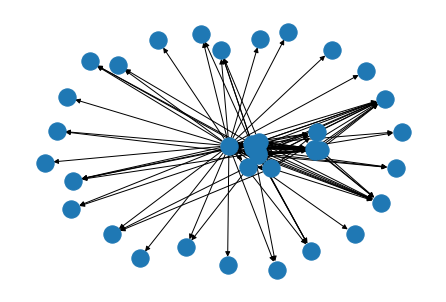

In [32]:
nx.draw(egonet)

#### Clustering Coefficient

Some social theories consider triads essential units of social network analysis.
Function nx.clustering(G, nodes=None) calculates the clustering coefficient—a
measure of the prevalence of triangles in an egocentric network. The clustering
coefficient is the fraction of possible triangles that contain the ego node and
exist.

If the clustering coefficient of a node is 1, the node participates in every possible
triangle involving any pair of its neighbors; the egocentric network of such a
node is a complete graph. If the clustering coefficient of a node is 0, no two
nodes in the neighborhood are connected; the egocentric network of such node is
a star. Think of the clustering coefficient as a measure of “stardom.”

In [33]:
cc = nx.clustering(nx.Graph(G), ego)
print(cc)

0.5043661547726589


The average clustering coefficient is not to be confused with the clustering
coefficient of the whole network—the fraction of all possible triangles that exist
in the network. The latter is known as transitivity, a measure of transitive closure
(explainedhere). NetworkX has a namesake function to calculate it, too:

You can see the discrepancy between the two alternative measures of the
“stardom.” The source of the discrepancy is a considerable proportion of nodes
with few neighbors. For such nodes, the local clustering coefficient is
traditionally high,

In [35]:
acc = nx.average_clustering(nx.Graph(G))
print(acc)

trans = nx.transitivity(G)
print(trans)

0.7161072833172181
0.05702242622285966


#### Think in Terms of Paths

Both dyadic and triadic relationships are local and never go farther than one
edge (or one “hop,” as network researchers say) from any of the involved nodes.
The purpose of the functions in this section is to take you far away—as far as
your network can afford.

For that, you need definitions of a walk, trail, and path.
* A walk in a network is any sequence of edges such that the end of one edge
is always the beginning of another edge, except possibly for the first and
last edges that may be connected only at one end.
* A trail is a walk that never uses the same edge twice. A trail that does not
intersect itself, but starts and ends at the same node, is called a cycle (a selfloop
edge explainedhere is a cycle).
* A path is a trail that never visits the same node twice (in other words, it
does not intersect itself; NetworkX refers to paths as “simple paths”).

Any of these walks is directed if any of its constituent edges is directed. For the
rest of the book, we will use only paths.

A path has the length. The length of a path in an unweighted network is the
number of edges in the path. When it comes to weighted paths, it is up to you to
decide how to calculate the length. Possible metrics include the number of edges,
the sum of the weights, the harmonic average of the weights, and the largest or
the smallest weight.

A path is a highway across the network that indirectly connects the nodes that
are not adjacent to each other, and allows them to interact. The meaning of the
remote interaction is specific to each class of complex networks. 

* In a social network, a path of length 3 connects the ego to the friend-of-a-friend-of-a-friend.
* In the network of Wikipedia pages, a path of length 3 connects the page about
neighborhoods to a page that is similar to a similar page. 
* In a transportation network, a node three hops away is the destination you can get to by changing
trains twice. 
* In some networks (like the network of foods and nutrients), long paths make no sense at all.

#### Shortest simple paths
Not only does NetworkX provide a set of tools for computing with paths, but it
also uses them for component detection and centrality calculation, to name a few
applications. Function nx.shortest_simple_paths(G,u,v) returns a generator of all
shortest paths between the nodes u and v.

In [42]:
path_gen = nx.shortest_simple_paths(G, ego, 'Cognitivism (Psychology)')
next(path_gen)

['Neighbourhood (Graph Theory)',
 'Adjacency List',
 'Computer Science',
 'Herbert A. Simon',
 'Cognitivism (Psychology)']

In [43]:
next(path_gen)

['Neighbourhood (Graph Theory)',
 'Adjacency Matrix',
 'Computer Science',
 'Herbert A. Simon',
 'Cognitivism (Psychology)']

In [44]:
next(path_gen)

['Neighbourhood (Graph Theory)',
 'Graph (Discrete Mathematics)',
 'Computer Science',
 'Herbert A. Simon',
 'Cognitivism (Psychology)']

#### Shortest Path
Function nx.shortest_path(G,source=None,target=None) returns only one of the
shortest paths between source and target, but if you omit either or both of the
parameters, it returns either all shortest paths starting at source, all shortest paths
ending at target, or all shortest paths in the network.

In [45]:
nx.shortest_path(G, ego, 'Cognitivism (Psychology)')

['Neighbourhood (Graph Theory)',
 'Adjacency List',
 'Computer Science',
 'Herbert A. Simon',
 'Cognitivism (Psychology)']

#### Networks as Circles
##### node eccentricity
CNA offers a concept of node eccentricity—a measure of how far from (or close
to) the center a node is, wherever the center is. The eccentricity is the maximum
distance from a node to all other nodes in the network. The distance between two
nodes is naturally defined as the length of the geodesic between the two nodes.

In [46]:
ecc = nx.eccentricity(nx.Graph(G))
print(ecc[ego])

3


The remaining “circular” network properties are defined through the
eccentricity. If you already calculated it, do not throw it away, but pass to the
following functions for the sake of performance.

* The diameter of a network is the maximum eccentricity. If two nodes are as
far apart as possible, they must be at the diametrically opposite ends of the
network, right?
* The radius of a network is the minimum eccentricity. This definition is not
intuitive, but it is what it is. What’s more counterintuitive, in general, is that
the radius is not a half of the diameter.
* The center of a network is a set of all nodes whose eccentricity equals the
radius. Another not very intuitive definition—but it yields a surprisingly
accurate result (see the following example).
* The periphery of a network is a set of all nodes whose eccentricity equals
the diameter. The set of peripheral nodes in a complex network is usually
large.

In the following examples, all circular measures are calculated based on the
precomputed eccentricity. There is no need to transform the digraph into a
directed graph anymore.

The eccentricity is a special case of path-based centralities: measures that
discriminate nodes by their position in the network. Centralities are
quintessential for social network analysis and most types of CNA in general.

In [47]:
print(nx.diameter(G, ecc))

4


In [48]:
nx.center(G, e=ecc)

['Complex Network']

In [49]:
nx.periphery(G, e=ecc)

['Proquest (Identifier)',
 'Cognitivism (Psychology)',
 'Crc Press',
 'Social Computing',
 'Myspace',
 'Herd Mentality',
 'Time Series Analysis',
 'Systems Theory In Archaeology',
 'Sociology Of Education',
 'Computer Cluster',
 'Ivan Pavlov',
 'Fediverse',
 'Algebra',
 'Massimo Marchiori',
 'Form (Html)',
 'David George Kendall',
 'Holoendemic',
 'Diaspora (Software)',
 'Complexity Measurement',
 'Search Engine Spammer',
 'Numerical Analysis',
 'Node (Graph Theory)',
 'Evolutionary Psychology',
 'Unicode',
 'Tiktok',
 'Linear Algebra',
 'Graph Rewriting',
 'Methodology',
 'Traffic Congestion',
 "Prokhorov'S Theorem",
 'Line Segment',
 'Wolfram Mathematica',
 'Cable Protection System',
 'Partial Differential Equation',
 'Ning (Website)',
 'Openurl',
 'Confidence Interval',
 'Computer Data Storage',
 'Yed',
 'Quiver (Mathematics)',
 'Vladimir K. Zworykin',
 'Sidney Redner',
 'Geisteswissenschaft',
 'Continuous-Time Stochastic Process',
 'Tumblr',
 'Functor',
 'Web Browser',
 'Yahoo! 360

### Choose the Right Centralities

One of the goals of social network analysis is to identify
actors with outstanding properties: the most influential, the
most efficient, the most irreplaceable—in other words, the
most important. 

In general, is also looking at the
most important nodes: key products in product networks;
key words in semantic networks; key events in the networks of events, and the
like.

One of the central premises of CNA is that the importance of a node
depends on the structural position of the node in the network and can be
calculated from neighborhoods, geodesics, or some other structural elements.

#### Degree Centrality

The simplest centrality measure is a node degree (also indegree and outdegree,
whenever necessary). Intuitively, a node with more edges, representing, say, an
actor with more ties, is more important than a node with only one edge. Degree
centrality is local and depends only on the node neighborhood.

In a network with a simple graph (no loops, no parallel edges), a node can have at most len(G)-1 neighbors.

The redefined degree centrality is always in the range from 0 (the node has no
neighbors) to 1 (the node is the hub of the global star). The normalization makes
it possible to compare nodes from different networks.

A node with a high degree centrality may be capable of affecting a lot of
neighbors in its neighborhood at once, but we cannot say anything about the
opportunities for global outreach.


#### Closeness and Harmonic Closeness Centrality

The closeness centrality is defined as the reciprocal mean distance (length of the
geodesics) from a node to all other reachable nodes in the network. It shows how
close the node is to the rest of the graph. This centrality is also in the range from
0 (the node has no neighbors; it is severed from the rest of the network) to 1 (the
node is the hub of the global star and is one hop away from any other node).

Another way to quantify the sense of closeness is to look at the mean reciprocal
distance (as opposed to the reciprocal mean distance; the order of the sum and
reciprocal operations reverses). Such measure is called harmonic centrality.
Regrettably, the NetworkX function for calculating harmonic centrality does not
normalize the result. Make sure you divide it by len(G)-1 to obtain comparable
measures.

#### Betweenness Centrality
The betweenness centrality is for control freaks. It measures the fraction of all
possible geodesics that pass through a node. If the betweenness is high, the node
is potentially a crucial go-between (thus the name) and has a brokerage
capability. The removal of such a node would disrupt communications in
communication networks, lengthen geodesics, lower closeness centralities, and
possibly split the network into disconnected components.

You can often find high-betweenness nodes in the vicinity of bridges. A bridge
is an edge whose removal would disconnect the network or significantly increase
the length of the geodesics. The latter kind of bridge is called a local bridge.
Pure bridges are rare in complex networks, but local bridges are not.

#### Eigenvector Centrality

Unlike the previously introduced centrality measures that rely on the
neighborhoods and geodesics to calculate the importance, the eigenvector
centrality uses a recursive definition of it.

Mathematically, the eigenvector centrality of a
node is the sum of the neighbors’ eigenvector centralities divided by λ—the
largest eigenvalue of the adjacency matrix of the network.

High eigenvector centrality identifies nodes that are surrounded by other nodes
with high eigenvector centrality. You can use this measure to locate groups of
interconnected nodes with high prestige.

#### PageRank

At least two more types of centralities are based on recursive principles similar
to the eigenvector centrality: PageRank and HITS [PBMW99].

PageRank was developed by Google (and named after Google’s Larry Page) to
rank web pages. The web pages are represented by nodes in a directed graph.
The graph edges correspond to hyperlinks. The rank of a node (and the
corresponding page) in the network is calculated as the probability that a person
randomly traversing the edges (clicking on links) will arrive at the node (page).

The algorithm is parametrized by the damping factor alpha=0.85, which is the
probability that the user will continue clicking. The page with the highest
PageRank is the most attractive: no matter where the person starts, this page is
the most likely final destination.

PageRank thrives on the concept of link traversing and makes sense only in
directed networks. If you pass an undirected graph to nx.pagerank, the function
will first convert it into a directed graph by replacing each undirected edge with
a pair of directed edges.

#### HITS Hubs and Authorities
The HITS (Hyperlink-Induced Topic Search) algorithm is an extended version of
PageRank. PageRank considers all graph nodes as potential terminals, or
“sinks.” Once you get into a sink, you likely get sunk. “Sink-style” networks
include the Web, trust networks (social networks built on the “A-trusts-B”
relationship), and organizational networks (“A-is-a-subordinate-of-B”).

You want to study a network from the opposite perspective: what is the
probability that a person randomly traversing the edges has started at the node?

You can either reverse the graph by calling G.reverse and then calculate the
PageRanks—or execute the HITS algorithm and get both hubs and authorities
values. Authorities are a loose counterpart of the PageRank. Hubs considers
outgoing links instead of incoming links. They serve as entry points into your
network so that you (or the fictitious randomly traversing person) could get to
the authorities most efficiently.

In [55]:
import networkx as nx
import matplotlib.pyplot as plt
# import dzcnapy_plotlib as dzcnapy
import csv
import numpy as np

In [51]:
with open("./data/sample_graph_data.csv") as infile:
    csv_reader = csv.reader(infile)
    G = nx.Graph(csv_reader)

In [52]:
#### Comparing the Centralities

dgr = nx.degree_centrality(G)
clo = nx.closeness_centrality(G)
har = nx.harmonic_centrality(G)
eig = nx.eigenvector_centrality(G)
bet = nx.betweenness_centrality(G)
pgr = nx.pagerank(G)
hits = nx.hits(G)


In [53]:
centralities = pd.concat(
                [pd.Series(c) for c in (hits[1], eig, pgr, har, clo, hits[0], dgr, bet)], axis=1)

centralities.columns = ("Authorities", "Eigenvector", "PageRank"
                            , "Harmonic Closeness", "Closeness", "Hubs"
                                ,"Degree", "Betweenness")
centralities["Harmonic Closeness"] /= centralities.shape[0]

In [54]:
centralities

,Authorities,Eigenvector,PageRank,Harmonic Closeness,Closeness,Hubs,Degree,Betweenness
ï»¿A,1.078288e-20,8.639434e-08,0.047619,0.047619,0.050000,1.583293e-18,0.05,0.000000
carrots,4.127190e-18,8.639434e-08,0.047619,0.047619,0.050000,4.136579e-21,0.05,0.000000
A,2.646009e-01,6.729529e-01,0.142471,0.309524,0.306250,2.646009e-01,0.30,0.105263
eggs,1.015075e-01,2.581615e-01,0.027327,0.182540,0.175000,1.015075e-01,0.05,0.000000
fatty fish,1.015075e-01,2.581615e-01,0.027327,0.182540,0.175000,1.015075e-01,0.05,0.000000
green leafy vegs,1.015075e-01,2.581615e-01,0.027327,0.182540,0.175000,1.015075e-01,0.05,0.000000
liver,1.015075e-01,2.581615e-01,0.027327,0.182540,0.175000,1.015075e-01,0.05,0.000000
milk,1.190240e-01,3.027109e-01,0.052286,0.214286,0.204167,1.190240e-01,0.10,0.031579
tomatoes,1.646846e-01,4.188383e-01,0.047524,0.182540,0.175000,1.646846e-01,0.15,0.000000
B12,4.566058e-02,1.161275e-01,0.029364,0.150794,0.136111,4.566058e-02,0.05,0.000000


In [56]:
c_df = centralities.corr()
ll_triangle = np.tri(c_df.shape[0], k=-1)
c_df *= ll_triangle
c_series = c_df.stack().sort_values()
c_series.tail()

Closeness    Eigenvector           0.964000
             Harmonic Closeness    0.998574
Eigenvector  Authorities           1.000000
Hubs         Eigenvector           1.000000
             Authorities           1.000000
dtype: float64

<AxesSubplot:xlabel='Harmonic Closeness', ylabel='Eigenvector'>

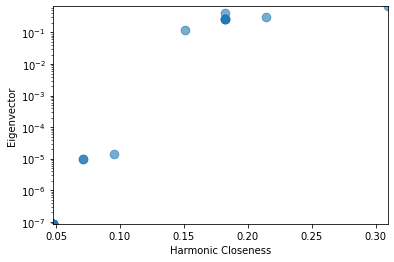

In [57]:
X = "Harmonic Closeness"
Y = "Eigenvector"
limits = pd.concat([centralities[[X, Y]].min(),
centralities[[X, Y]].max()], axis=1).values
centralities.plot(kind="scatter", x=X, y=Y, xlim=limits[0], ylim=limits[1],
s=75, logy=True, alpha=0.6)

#### Estimate Network Uniformity Through Assortativity

Attribute analysis looks into assortativity: correlation between the values of a
node attribute across edges. A network with positively correlated attributes is
called assortative; in an assortative network, nodes tend to connect to nodes with
similar attribute values. This tendency is called assortative mixing. A
dissortative (negatively correlated) network is the opposite of an assortative one.

The simplest form of assortativity is degree (indegree, outdegree) assortativity:
the correlation between the degree of a node and the average degree of its
neighbors.

In [61]:
# returns a dictionary with unique node degrees as keys and matching average neighbors’ 
# degrees as values.
my_degree, their_degree = zip(*nx.average_degree_connectivity(G).items())

The ith row and jth column of the array contain the fraction of adjacent nodes
that have the ith and jth values of the attribute, respectively. The mapping links
non-numeric attribute values with row and column indexes.

In [63]:
# NetworkX provides two functions for assessing attribute assortativity. The first
# function nx.attribute_mixing_matrix takes a graph, an attribute name, and an
# optional mapping dictionary, and returns a two-dimensional NumPy array.

nx.attribute_mixing_matrix(G, "thiamin", mapping={"M": 0, "F": 1})

array([[nan, nan],
       [nan, nan]])

The second function, nx.attribute_assortativity_coefficient, confirms the previous
result. The function returns the assortativity coefficient—the correlation between
the values of an attribute across edges.

In [64]:
nx.attribute_assortativity_coefficient(G, "thiamin")

c:\Users\ramsi\anaconda3\envs\graph_env\lib\site-packages\networkx\algorithms\assortativity\correlation.py:261: RuntimeWarning: invalid value encountered in double_scalars
  r = (t - s) / (1 - s)


nan